In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [2]:
#load data
data = pd.read_csv("..\..\Data\Day\S&P 500 Historical Data00-20.csv")

In [3]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [4]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

In [5]:
special_data = pd.DataFrame(data)

In [6]:
special_data = data[(data['Date'] > '2012-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [7]:
#change indexes
special_data.set_index('Date', inplace = True)

In [8]:
data.head(10)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [9]:
special_data.head(10)

,Price,Open,High,Low,Change %,Timestamp
Date,,,,,,
2012-01-03,1277.06,1258.86,1284.62,1258.86,1.55%,01/03/2012
2012-01-04,1277.30,1277.03,1278.73,1268.10,0.02%,01/04/2012
2012-01-05,1281.06,1277.30,1283.05,1265.26,0.29%,01/05/2012
2012-01-06,1277.81,1280.93,1281.84,1273.34,-0.25%,01/06/2012
2012-01-09,1280.70,1277.83,1281.99,1274.55,0.23%,01/09/2012
2012-01-10,1292.08,1280.77,1296.46,1280.77,0.89%,01/10/2012
2012-01-11,1292.48,1292.02,1293.80,1285.41,0.03%,01/11/2012
2012-01-12,1295.50,1292.48,1296.82,1285.77,0.23%,01/12/2012
2012-01-13,1289.09,1294.82,1294.82,1277.58,-0.49%,01/13/2012


In [10]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2012-01-03,1277.06,1258.86,1284.62,1258.86,1.55%,01/03/2012,1277.06,1277.06
2012-01-04,1277.30,1277.03,1278.73,1268.10,0.02%,01/04/2012,1277.30,1277.30
2012-01-05,1281.06,1277.30,1283.05,1265.26,0.29%,01/05/2012,1281.06,1281.06
2012-01-06,1277.81,1280.93,1281.84,1273.34,-0.25%,01/06/2012,1277.81,1277.81
2012-01-09,1280.70,1277.83,1281.99,1274.55,0.23%,01/09/2012,1280.70,1280.70


In [11]:
import datetime

special_data.loc[0, 'new_index'] = 1325419200
special_data.loc[0, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[0, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.loc[i, 'new_index'] = special_data.new_index[i - 1] + 86400
        special_data.loc[i, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[i, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')

In [12]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [13]:
special_data.head(20)

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2012-01-01 19:00:00,1277.06,1258.86,1284.62,1258.86,1.55%,01/03/2012,1.325419e+09
2012-01-02 19:00:00,1277.30,1277.03,1278.73,1268.10,0.02%,01/04/2012,1.325506e+09
2012-01-03 19:00:00,1281.06,1277.30,1283.05,1265.26,0.29%,01/05/2012,1.325592e+09
2012-01-04 19:00:00,1277.81,1280.93,1281.84,1273.34,-0.25%,01/06/2012,1.325678e+09
2012-01-05 19:00:00,1280.70,1277.83,1281.99,1274.55,0.23%,01/09/2012,1.325765e+09
2012-01-06 19:00:00,1292.08,1280.77,1296.46,1280.77,0.89%,01/10/2012,1.325851e+09
2012-01-07 19:00:00,1292.48,1292.02,1293.80,1285.41,0.03%,01/11/2012,1.325938e+09
2012-01-08 19:00:00,1295.50,1292.48,1296.82,1285.77,0.23%,01/12/2012,1.326024e+09
2012-01-09 19:00:00,1289.09,1294.82,1294.82,1277.58,-0.49%,01/13/2012,1.326110e+09


In [14]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [15]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

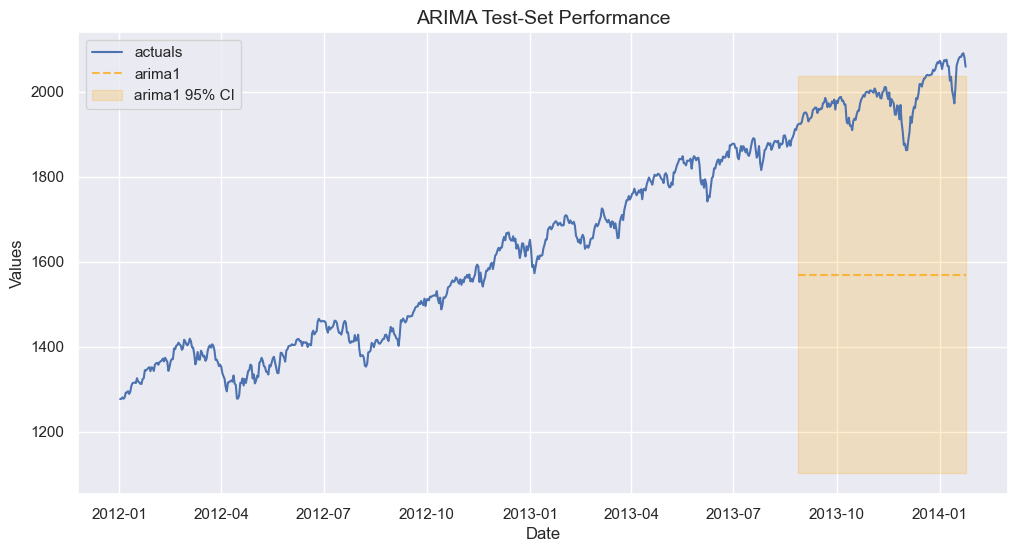

In [16]:
f.generate_future_dates(100) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

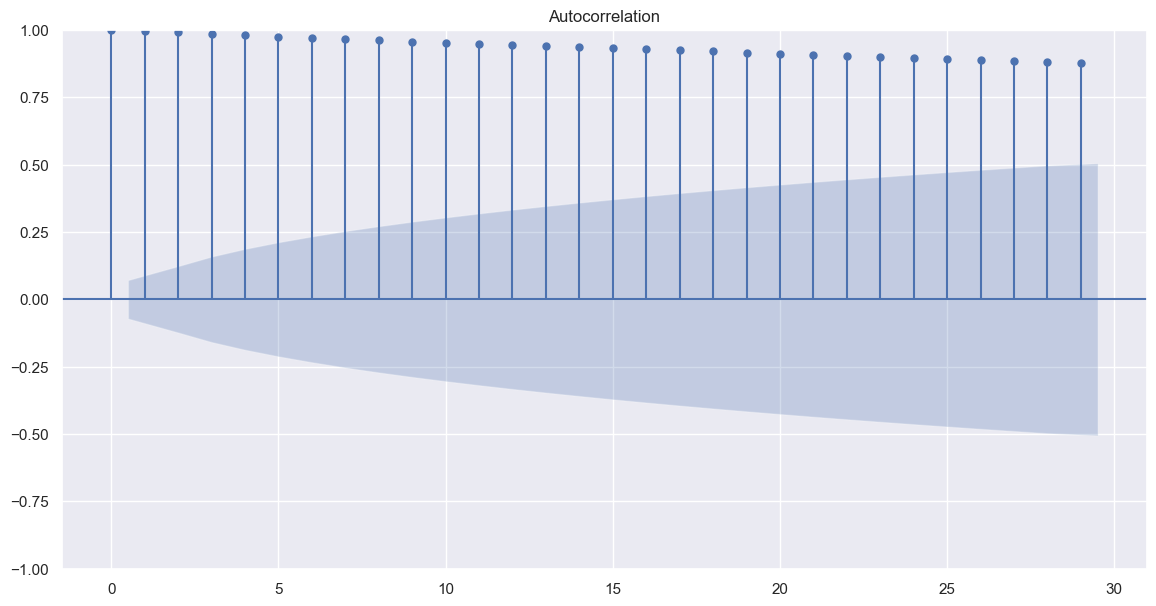

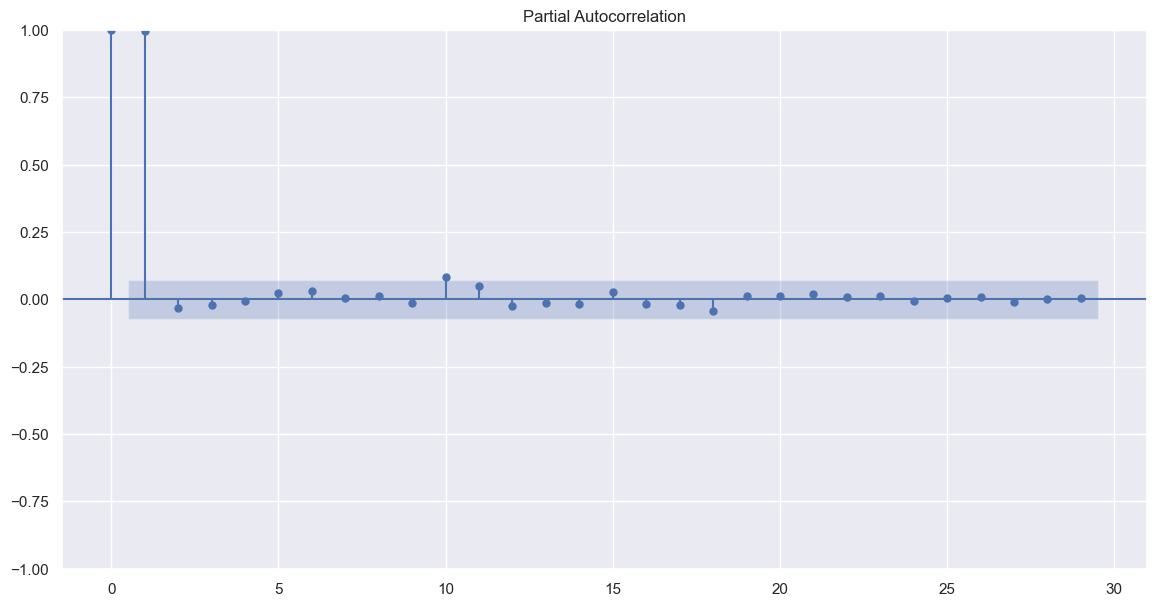

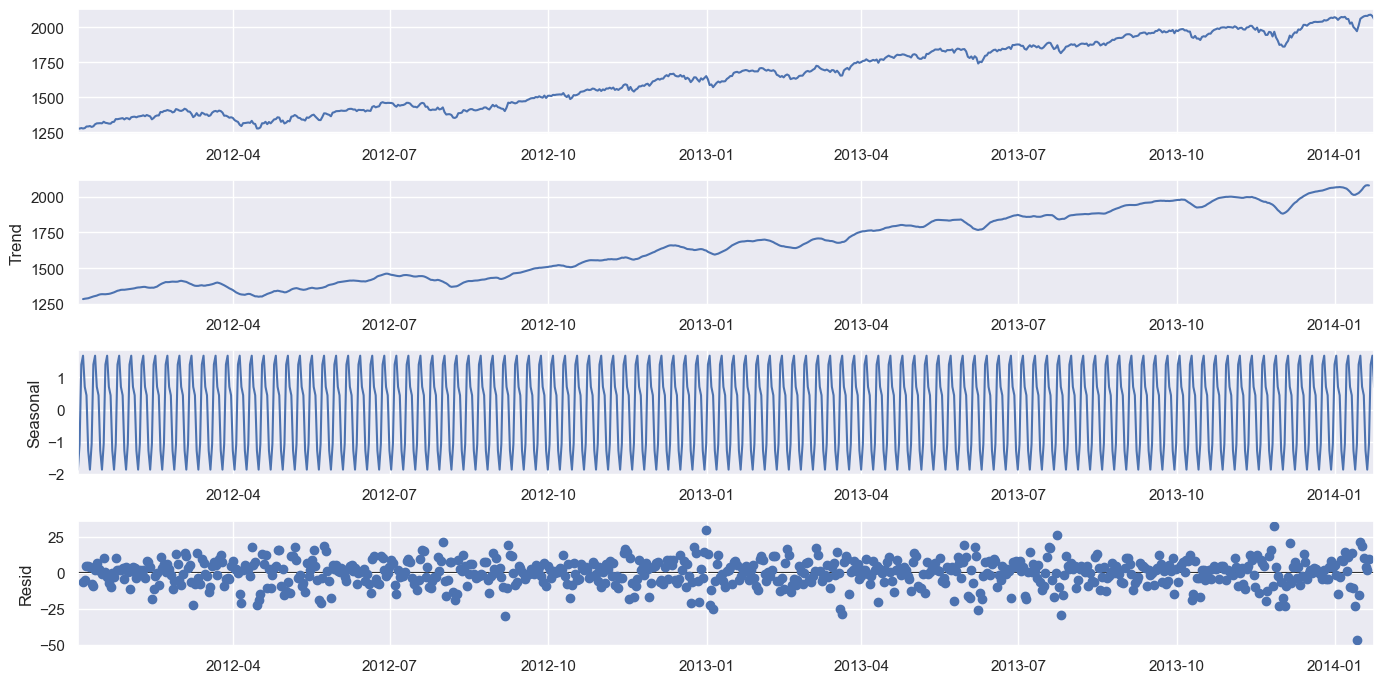

-0.5377794176089036
0.8844308839907188


In [17]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

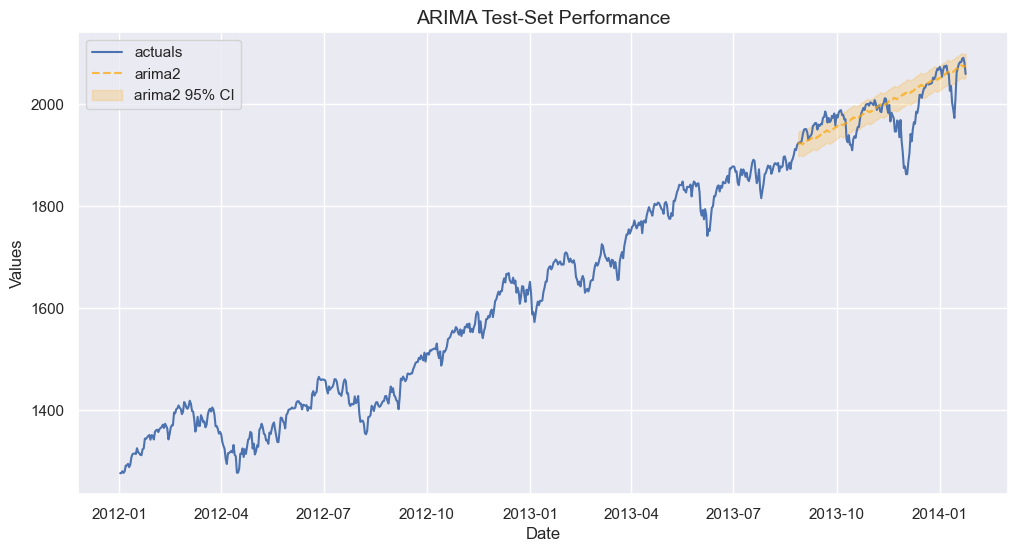

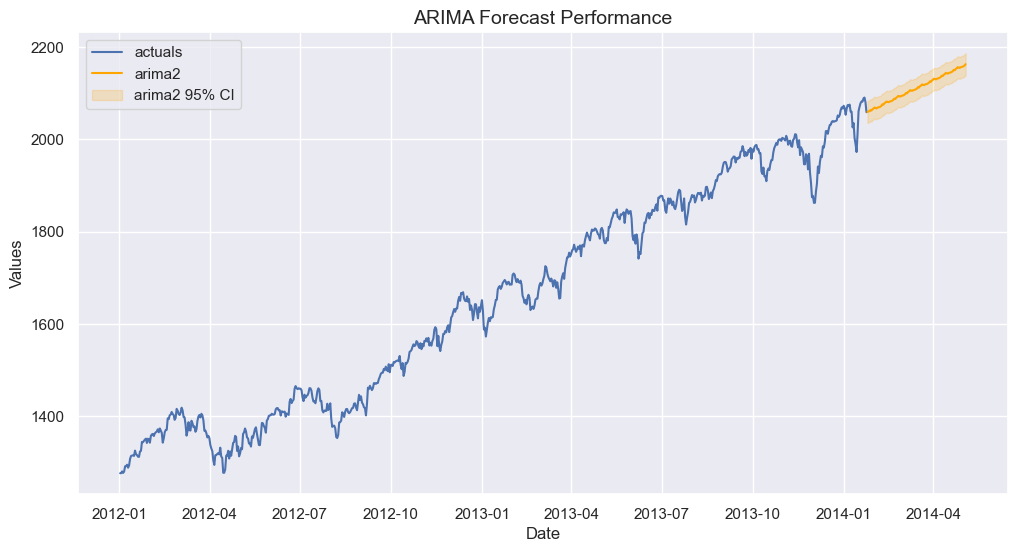

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  754
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2922.916
Date:                          Sun, 22 Oct 2023   AIC                           5859.831
Time:                                  11:04:42   BIC                           5892.087
Sample:                                       0   HQIC                          5872.267
                                          - 754                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0223      1.960     -0.011      0.991      -3.863       3.819
ar.L2          0.0165      0.038      0.441      0.659      -0.057       0.090
ma.L1          0.0134      1.956      0.007      0.995      -3.821       3.848
ar.S.L12      -0.0157      0.045     -0.352      0.725      -0.103       0.072
ar.S.L24       0.0085      0.044      0.193      0.847      -0.077       0.094
ma.S.L12      -0.9993      0.903     -1.107      0.268      -2.769       0.770
sigma2       146.1275    130.326      1.121      0.262    -109.307     401.562
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.09
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [20]:
adf_test(special_data['Close'])

1. ADF :  -0.5377794176089036
2. P-Value :  0.8844308839907188
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 753
5. Critical Values :
	 1% :  -3.4390641198617864
	 5% :  -2.8653859408474482
	 10% :  -2.5688179819544312


In [21]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  754
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2943.424
Date:                Sun, 22 Oct 2023   AIC                           5890.848
Time:                        11:04:43   BIC                           5900.096
Sample:                    01-01-2012   HQIC                          5894.410
                         - 01-23-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0383      0.445      2.335      0.020       0.167       1.910
sigma2       145.4717      5.869     24.787      0.000     133.969     156.975
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                66.04
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
data_len = len(special_data)

In [23]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [24]:
train_data = special_data.iloc[:int(train_len)]

In [25]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [26]:
test_data.Close

new_date
2013-06-11 19:00:00    1797.02
2013-06-12 19:00:00    1799.84
2013-06-13 19:00:00    1819.75
2013-06-14 19:00:00    1819.26
2013-06-15 19:00:00    1829.83
                        ...   
2014-01-19 19:00:00    2081.88
2014-01-20 19:00:00    2088.77
2014-01-21 19:00:00    2090.57
2014-01-22 19:00:00    2080.35
2014-01-23 19:00:00    2058.90
Name: Close, Length: 227, dtype: float64

In [27]:
train_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2012-01-01 19:00:00,1277.06,1258.86,1284.62,1258.86,1.55%,01/03/2012,1.325419e+09
2012-01-02 19:00:00,1277.30,1277.03,1278.73,1268.10,0.02%,01/04/2012,1.325506e+09
2012-01-03 19:00:00,1281.06,1277.30,1283.05,1265.26,0.29%,01/05/2012,1.325592e+09
2012-01-04 19:00:00,1277.81,1280.93,1281.84,1273.34,-0.25%,01/06/2012,1.325678e+09
2012-01-05 19:00:00,1280.70,1277.83,1281.99,1274.55,0.23%,01/09/2012,1.325765e+09
...,...,...,...,...,...,...,...
2013-06-06 19:00:00,1782.59,1790.88,1793.88,1772.26,-0.65%,01/31/2014,1.370520e+09
2013-06-07 19:00:00,1741.89,1782.68,1784.83,1739.66,-2.28%,02/03/2014,1.370606e+09
2013-06-08 19:00:00,1755.20,1743.82,1758.73,1743.82,0.76%,02/04/2014,1.370693e+09


In [28]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=4061.930, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=4063.728, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=4065.446, Time=0.08 sec


 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=4066.789, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=4066.187, Time=0.15 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=4066.369, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=4063.737, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=4067.034, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=4067.451, Time=0.21 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=4066.534, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=4065.518, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,4)(0,0,0)[1] intercept   : AIC=4068.183, Time=0.24 sec
 ARIMA(2,1,5)(0,0,0)[1] intercept   : AIC=4068.527, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  527
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2028.965
Date:                Sun, 22 Oct 2023   AIC                           4061.930
Time:                        11:04:55   BIC                           4070.461
Sample:                    01-01-2012   HQIC                          4065.270
                         - 06-10-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9437      0.506      1.866      0.062      -0.047       1.935
sigma2       131.2126      6.601     19.877      0.000     118.274     144.151
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                32.05
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.27
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

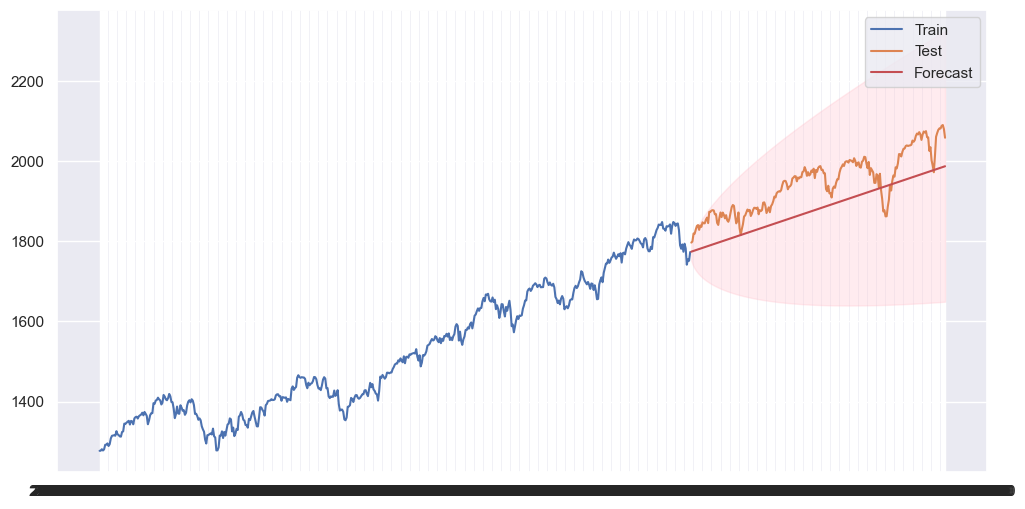

In [29]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [30]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data.Close, order=(2, 1, 2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  527
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2024.044
Date:                Sun, 22 Oct 2023   AIC                           4058.088
Time:                        11:04:58   BIC                           4079.414
Sample:                    01-01-2012   HQIC                          4066.438
                         - 06-10-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5704      0.008    204.018      0.000       1.555       1.586
ar.L2         -0.9895      0.008   -120.823      0.000      -1.006      -0.973
ma.L1         -1.5919      0.094    -16.975      0.000      -1.776      -1.408
ma.L2          0.9995      0.118      8.459      0.000       0.768       1.231
sigma2       127.8792     15.419      8.294      0.000      97.659     158.099
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                28.48
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.27
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Price')

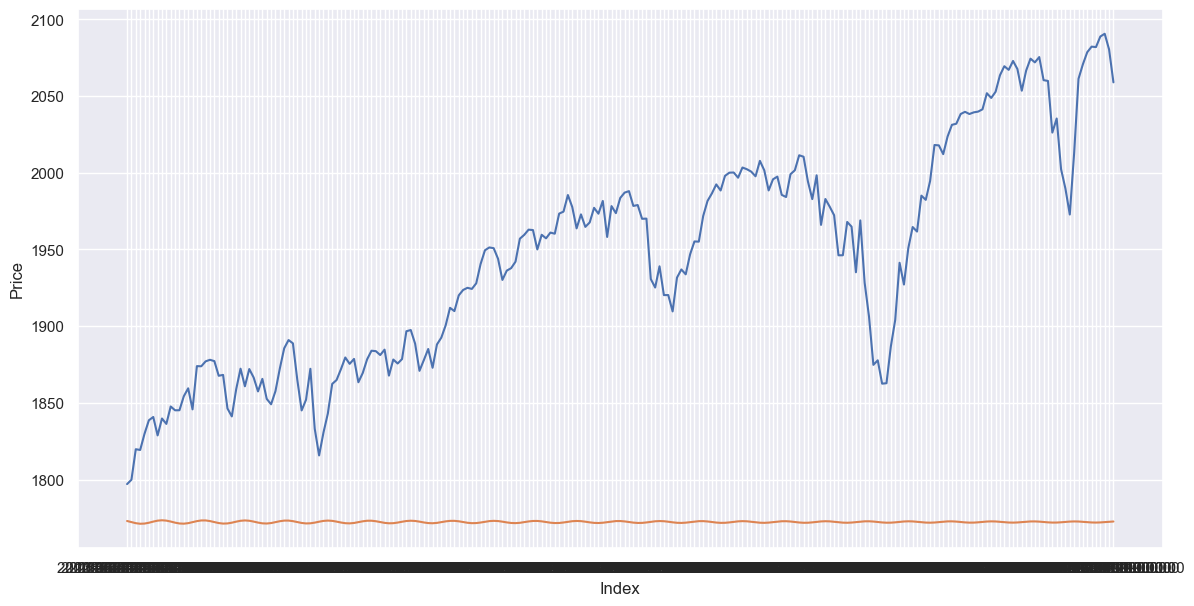

In [31]:
start=test_data.index[0]
end=test_data.index[len(test_data)-1]
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, pred)
plt.xlabel('Index')
plt.ylabel('Price')

In [32]:
pred

2013-06-11 19:00:00    1772.965297
2013-06-12 19:00:00    1772.229102
2013-06-13 19:00:00    1771.532772
2013-06-14 19:00:00    1771.167686
2013-06-15 19:00:00    1771.283354
                          ...     
2014-01-19 19:00:00    1771.942412
2014-01-20 19:00:00    1772.034372
2014-01-21 19:00:00    1772.239097
2014-01-22 19:00:00    1772.469612
2014-01-23 19:00:00    1772.629048
Freq: D, Name: ARIMA predictions, Length: 227, dtype: float64

In [33]:
test = list()
temper = pd.DataFrame(train_data.Close)
for i in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(temper, order=(2, 1, 2))
    model = model.fit()
    start=test_data.index[i]
    end=test_data.index[len(test_data)-1]
    #if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
    #index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
    pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
    temper.loc[start] = pred[0]
    test.append(pred[0])

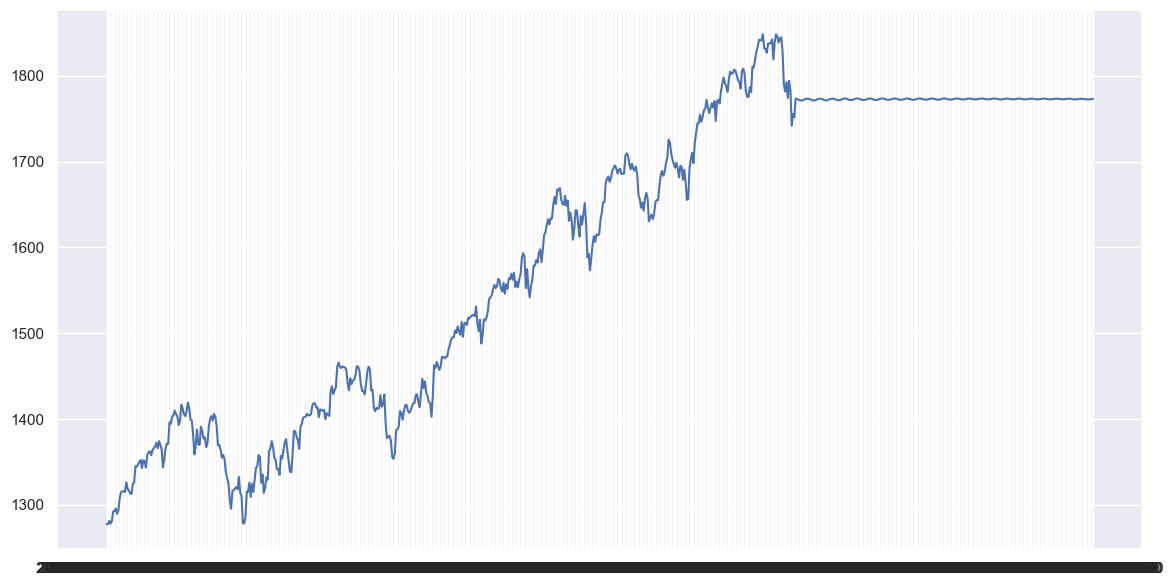

In [34]:
plt.plot(temper)

In [35]:
temper

,Close
new_date,
2012-01-01 19:00:00,1277.060000
2012-01-02 19:00:00,1277.300000
2012-01-03 19:00:00,1281.060000
2012-01-04 19:00:00,1277.810000
2012-01-05 19:00:00,1280.700000
...,...
2014-01-19 19:00:00,1772.323063
2014-01-20 19:00:00,1772.439243
2014-01-21 19:00:00,1772.691804


In [36]:
test

[1772.9652969811916,
 1772.2272915068343,
 1771.520315828386,
 1771.1623018582438,
 1771.306835178426,
 1771.8510668699564,
 1772.5591004706887,
 1773.1584287160276,
 1773.3897989938257,
 1773.162117499176,
 1772.5572931944916,
 1771.832749809607,
 1771.2989164947016,
 1771.1712296053026,
 1771.5132900819647,
 1772.1574769548663,
 1772.8445888367298,
 1773.2764443497917,
 1773.2962687047936,
 1772.881078058195,
 1772.2090715591503,
 1771.5784886465115,
 1771.2440133573139,
 1771.3444027382573,
 1771.9697536011308,
 1772.6476463460667,
 1773.2079286603298,
 1773.433973692472,
 1773.212048084602,
 1772.670721183886,
 1772.033715429574,
 1771.5574206415997,
 1771.4459738646551,
 1771.750970781522,
 1772.4637167432893,
 1773.0967366242778,
 1773.5021606163878,
 1773.5233524771438,
 1773.1528483966138,
 1772.5537026336328,
 1771.9574281660757,
 1771.6498526476903,
 1771.8406694430835,
 1772.2878602868934,
 1772.8733356001333,
 1773.4058819968805,
 1773.5358649035775,
 1773.3544048714866,
 1

In [37]:
test_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2013-06-11 19:00:00,1797.02,1776.01,1798.03,1776.01,1.33%,02/07/2014,1.370952e+09
2013-06-12 19:00:00,1799.84,1796.20,1799.94,1791.83,0.16%,02/10/2014,1.371038e+09
2013-06-13 19:00:00,1819.75,1800.45,1823.54,1800.41,1.11%,02/11/2014,1.371125e+09
2013-06-14 19:00:00,1819.26,1820.12,1826.55,1815.97,-0.03%,02/12/2014,1.371211e+09
2013-06-15 19:00:00,1829.83,1814.82,1830.25,1809.22,0.58%,02/13/2014,1.371298e+09
...,...,...,...,...,...,...,...
2014-01-19 19:00:00,2081.88,2083.25,2087.56,2081.86,-0.01%,12/24/2014,1.390133e+09
2014-01-20 19:00:00,2088.77,2084.30,2092.70,2084.30,0.33%,12/26/2014,1.390219e+09
2014-01-21 19:00:00,2090.57,2087.63,2093.55,2085.75,0.09%,12/29/2014,1.390306e+09


Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4663.841, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4666.989, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4666.968, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4666.976, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4665.113, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4665.104, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4665.654, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4665.753, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4665.747, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.987 seconds


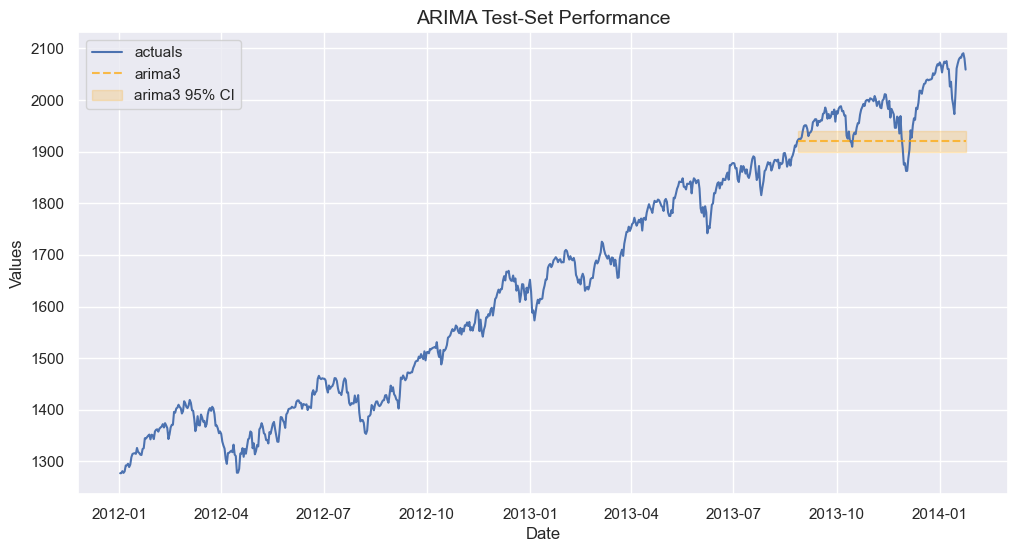

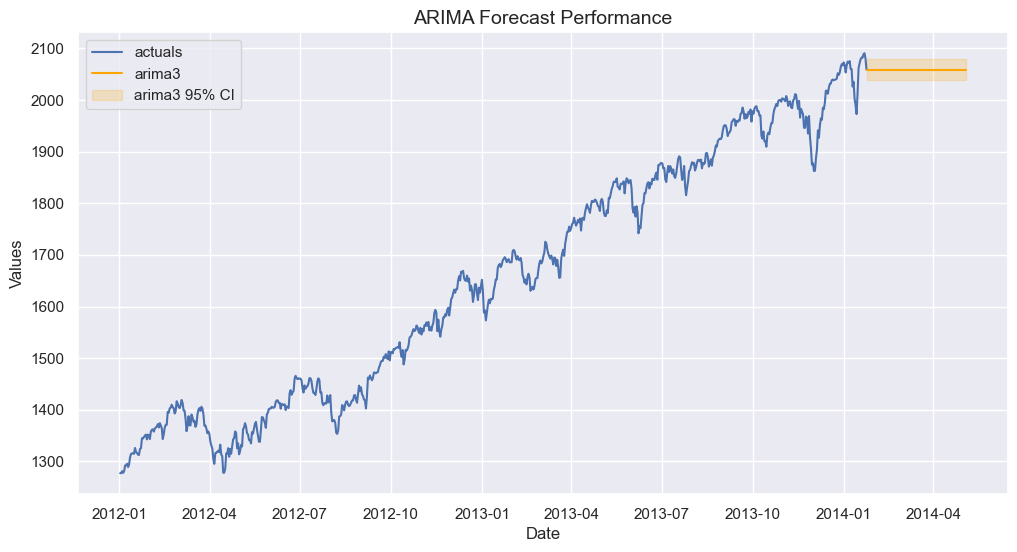

In [38]:
from scalecast.auxmodels import auto_arima

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [39]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  754
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2946.204
Date:                Sun, 22 Oct 2023   AIC                           5894.407
Time:                        11:06:10   BIC                           5899.031
Sample:                             0   HQIC                          5896.189
                                - 754                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       146.5521      5.946     24.646      0.000     134.898     158.207
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                66.04
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

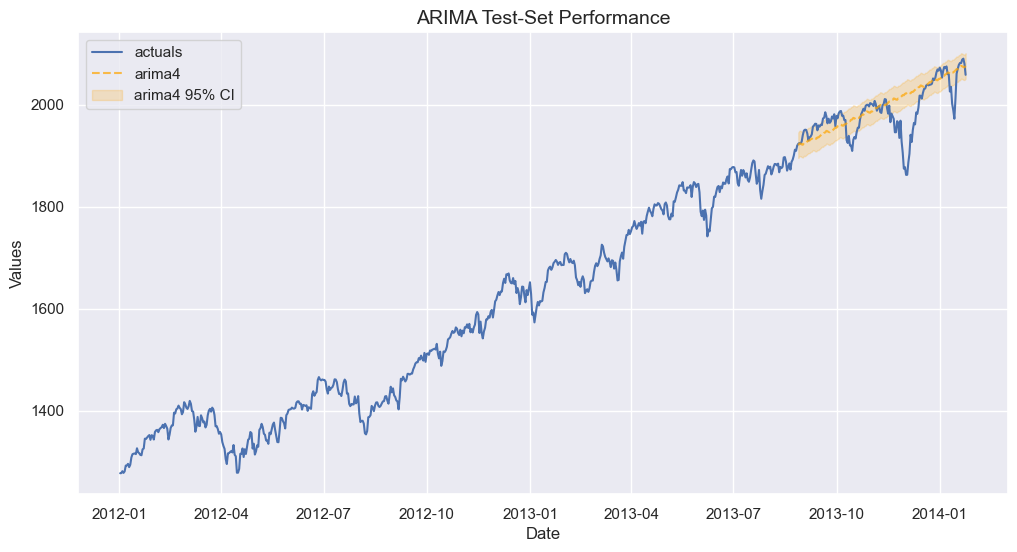

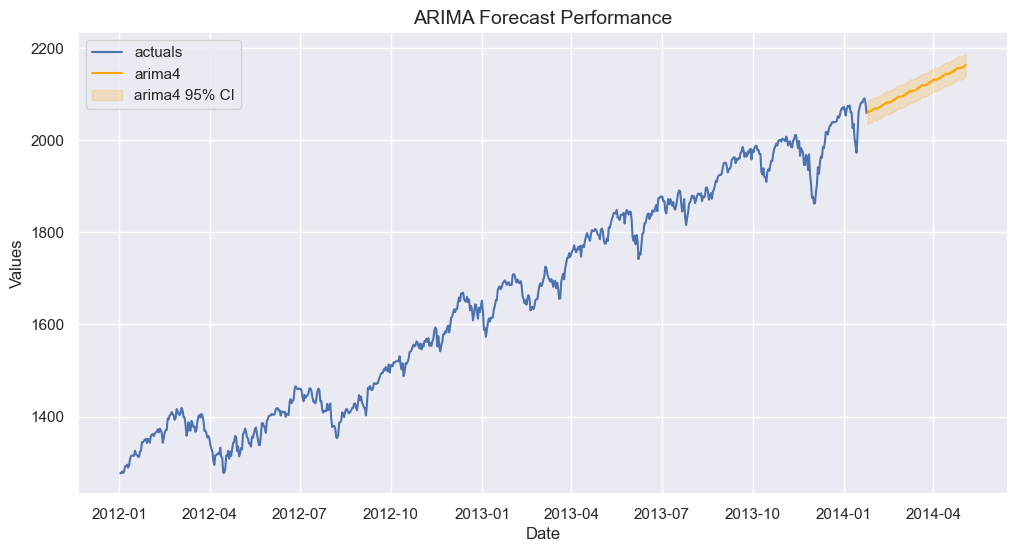

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  754
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2922.546
Date:                          Sun, 22 Oct 2023   AIC                           5855.092
Time:                                  11:06:27   BIC                           5878.132
Sample:                                       0   HQIC                          5863.974
                                          - 754                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9254      0.152     -6.104      0.000      -1.223      -0.628
ma.L1          0.9102      0.163      5.573      0.000       0.590       1.230
ar.S.L12      -0.0234      0.045     -0.525      0.599      -0.111       0.064
ma.S.L12      -0.9941      0.096    -10.324      0.000      -1.183      -0.805
sigma2       146.6884     13.921     10.537      0.000     119.403     173.973
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                51.21
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [41]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [42]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima2,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.007666,0.014584
1,arima4,"{'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)}",0.007666,0.014593
2,arima3,"{'order': (0, 1, 0), 'seasonal_order': (0, 0, 0, 12), 'trend': None}",0.006832,0.034464
3,arima1,{},0.130636,0.209188
